In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/gauraviiita/Supervised_ML/main/Datasets/housing_price/Housing%20Price%20data%20set.csv")

In [3]:
data.shape

(546, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  546 non-null    int64  
 1   price       546 non-null    float64
 2   lotsize     546 non-null    int64  
 3   bedrooms    546 non-null    int64  
 4   bathrms     546 non-null    int64  
 5   stories     546 non-null    int64  
 6   driveway    546 non-null    object 
 7   recroom     546 non-null    object 
 8   fullbase    546 non-null    object 
 9   gashw       546 non-null    object 
 10  airco       546 non-null    object 
 11  garagepl    546 non-null    int64  
 12  prefarea    546 non-null    object 
dtypes: float64(1), int64(6), object(6)
memory usage: 55.6+ KB


In [5]:
data.head()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [6]:
df = data.iloc[:, 1:]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     546 non-null    float64
 1   lotsize   546 non-null    int64  
 2   bedrooms  546 non-null    int64  
 3   bathrms   546 non-null    int64  
 4   stories   546 non-null    int64  
 5   driveway  546 non-null    object 
 6   recroom   546 non-null    object 
 7   fullbase  546 non-null    object 
 8   gashw     546 non-null    object 
 9   airco     546 non-null    object 
 10  garagepl  546 non-null    int64  
 11  prefarea  546 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 51.3+ KB


In [8]:
for i in df:
    if(str(df[i].dtype)=="object"):
        df[i] = LabelEncoder().fit_transform(df[i])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     546 non-null    float64
 1   lotsize   546 non-null    int64  
 2   bedrooms  546 non-null    int64  
 3   bathrms   546 non-null    int64  
 4   stories   546 non-null    int64  
 5   driveway  546 non-null    int32  
 6   recroom   546 non-null    int32  
 7   fullbase  546 non-null    int32  
 8   gashw     546 non-null    int32  
 9   airco     546 non-null    int32  
 10  garagepl  546 non-null    int64  
 11  prefarea  546 non-null    int32  
dtypes: float64(1), int32(6), int64(5)
memory usage: 38.5 KB


In [10]:
x = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [11]:
x.head()

,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,5850,3,1,2,1,0,1,0,0,1,0
1,4000,2,1,1,1,0,0,0,0,0,0
2,3060,3,1,1,1,0,0,0,0,0,0
3,6650,3,1,2,1,1,0,0,0,0,0
4,6360,2,1,1,1,0,0,0,0,0,0


In [12]:
y.head()

0    42000.0
1    38500.0
2    49500.0
3    60500.0
4    61000.0
Name: price, dtype: float64

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=4)

In [47]:
print(x_train.shape)
print(x_test.shape)

(382, 11)
(164, 11)


In [48]:
print(y_train.shape)
print(y_test.shape)

(382,)
(164,)


In [49]:
model = LinearRegression()

In [50]:
model.fit(x_train, y_train)

LinearRegression()

In [51]:
y_pred = model.predict(x_test)

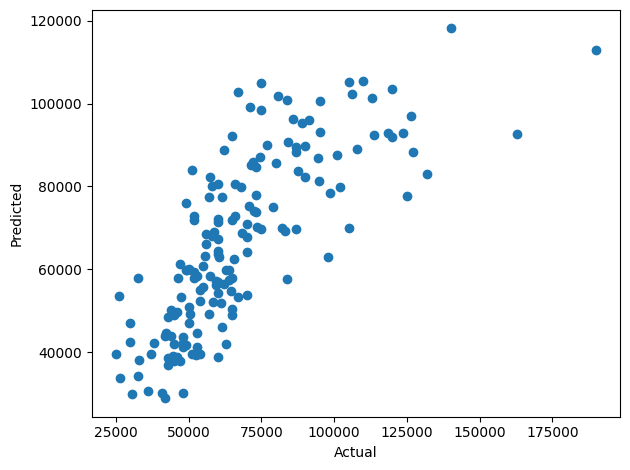

In [52]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.tight_layout()

In [53]:
mse_value = mean_squared_error(y_test, y_pred)
rmse_value = np.sqrt(mse_value)
print("Root mean square error value is: ", rmse_value)
print(f"R2 score is {r2_score(y_test, y_pred)}")

Root mean square error value is:  17077.115837805766
R2 score is 0.5873208211034302
